In [26]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from geopy.geocoders import Nominatim

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

realestate = pd.read_csv("./data/Ames Real Estate Data.csv", low_memory = False)
HousePrice = pd.read_csv("./data/Ames_HousePrice.csv",index_col = [0])

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML


In [27]:
realestate = pd.DataFrame(realestate)
HousePrice = pd.DataFrame(HousePrice)

In [28]:
print(realestate.shape)
print(HousePrice.shape)

(22213, 91)
(2580, 81)


In [30]:
HousePrice.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  
3       0     11   2007      WD          Normal  
4       0      5   2009      WD          Normal  
5       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [25]:
realestate.head()
HousePrice.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  
3       0     11   2007      WD          Normal  
4       0      5   2009      WD          Normal  
5       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [31]:
realestate.describe()
HousePrice.describe()
print("realestate columns: ",realestate.columns)
print("HousePrice columns: ", HousePrice.columns)
HousePrice.columns.intersection(realestate.columns)

realestate columns:  Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
       'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
       'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
       'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
       'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType',
       'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_

Index(['SalePrice', 'LotArea', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageArea', 'PoolArea', 'SaleType'],
      dtype='object')

In [47]:
# HousingPrice data
# PID
#Property Location:
#                   
#
#House attributes:
# Ourdoor Veneer: 
#         Numeric: LotFrontage, LotArea, MasVnrArea
#         Categorical: LotShape, LandContour, LotConfig, LandSlope,
#                     BldgType, HouseStyle, 
#                     Exteropr1st, Exteropr2md
#                     MasVnrType, 
#                     ExterQual, ExterCond, 
#                     PavedDrive
#                     WoodDeckSF, 
#                     OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC,
#                     Fence, MiscFeature, MiscVal
# Mechanics: 
#         Numeric: 
#         Categorical: Utilities,
#                      Foundation,
#                      Heating,
#                      HeatingQC,
#                      CentralAir, 
#                      Electrical,
# Indoor Quality: 
#                      Numeric: 
#                                 BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
#                                 GarageArea,
#                                 1stFlrSF,
#                                 2ndFlrSF, LowQualFinSF
#                  Categorical: 
#                             RoofStyle,
#                             RoofMatl,
#                             BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFullBath, BsmtHalfBath
#                             FullBath, HalfBath,
#                             BedroomAbvGr,
#                             KitchenAbvGr,KitchenQual
#                             TotRmsAbvGrd
#                             Fireplaces,FireplaceQu
#                             GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea,
#                               GarageQual,GarageCond
#  Location:          Numeric: 
#                        
#                      Categorical: 
#                                  Condition1,
#                                  Condition2,
#                                  MSSubClass, MSZoning,Neighborhood
#  Overall Quality: 
#                 OverallQual
#                 OverallCond
#                 YearBuilt
#                 YearRemodAdd
#                   Functional
#Sale info: 
#           'SalePrice', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

In [84]:
# check in realestate data
# owner info: 
#            'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
#             'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2','Rcrd_Yr', 'Rcrd_Mo',
#              'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr'
# Property Location: 
#              'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr','ZngCdPr',
#              'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S','Legal_Pr',
#               'SchD_S', 'TxD_S'
# House attributes: 
#               'LndAc_S', 'ImpAc_S',
#               'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
#               'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
#               'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
#               'AcreX_S1', 'AcreGr', 'AcreNt_S','Neighborhood', 'LotArea', 'ParType',
#               'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle','Foundation', 
#               'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating','Central Air', 'GLA', 
#               'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces','PoolArea', 'GarageType', 'GarYrBlt', 
#                'Cars', 'GarageArea',
# sale info: 'YrSold_YYYY', 'MoSold_MM', 'SalePrice', 'SaleType', 'SaleCond',
#        'ParclRel', 'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD',
#        'PA-UnTyp', 'PA-UntNo', 'Date', 'Source', 'NmbrBRs'
    


In [33]:
cols = HousePrice.columns
num_cols = HousePrice._get_numeric_data().columns
num_cols
num_df = HousePrice[list(set(num_cols) - set(['PID',"MSSubClass"]))]
num_df.columns

Index(['MasVnrArea', 'BsmtUnfSF', 'Fireplaces', 'YrSold', 'KitchenAbvGr',
       'GrLivArea', 'ScreenPorch', 'OverallCond', 'GarageYrBlt', 'GarageArea',
       'PoolArea', 'BsmtFullBath', '1stFlrSF', 'LotArea', 'HalfBath',
       'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'BsmtFinSF2',
       'YearBuilt', 'BedroomAbvGr', 'EnclosedPorch', 'FullBath', '3SsnPorch',
       'YearRemodAdd', 'MiscVal', 'TotRmsAbvGrd', 'LowQualFinSF',
       'TotalBsmtSF', 'GarageCars', 'LotFrontage', 'BsmtHalfBath', '2ndFlrSF',
       'SalePrice', 'OverallQual'],
      dtype='object')

In [34]:
len(num_df.columns)

36

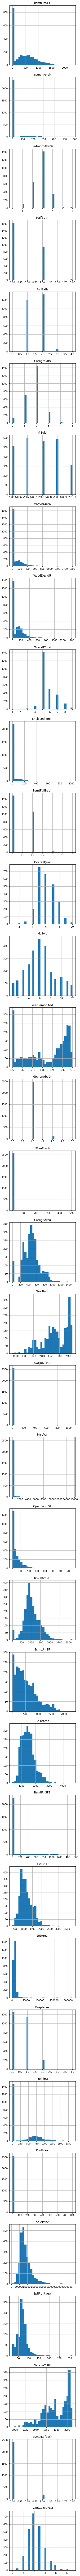

In [9]:
fig, axs = plt.subplots(len(num_df.columns),figsize=(5, 200))
for n, col in enumerate(num_df.columns):
    num_df[col].hist(ax=axs[n], bins = 30)
    axs[n].set_title(col)

<AxesSubplot:>

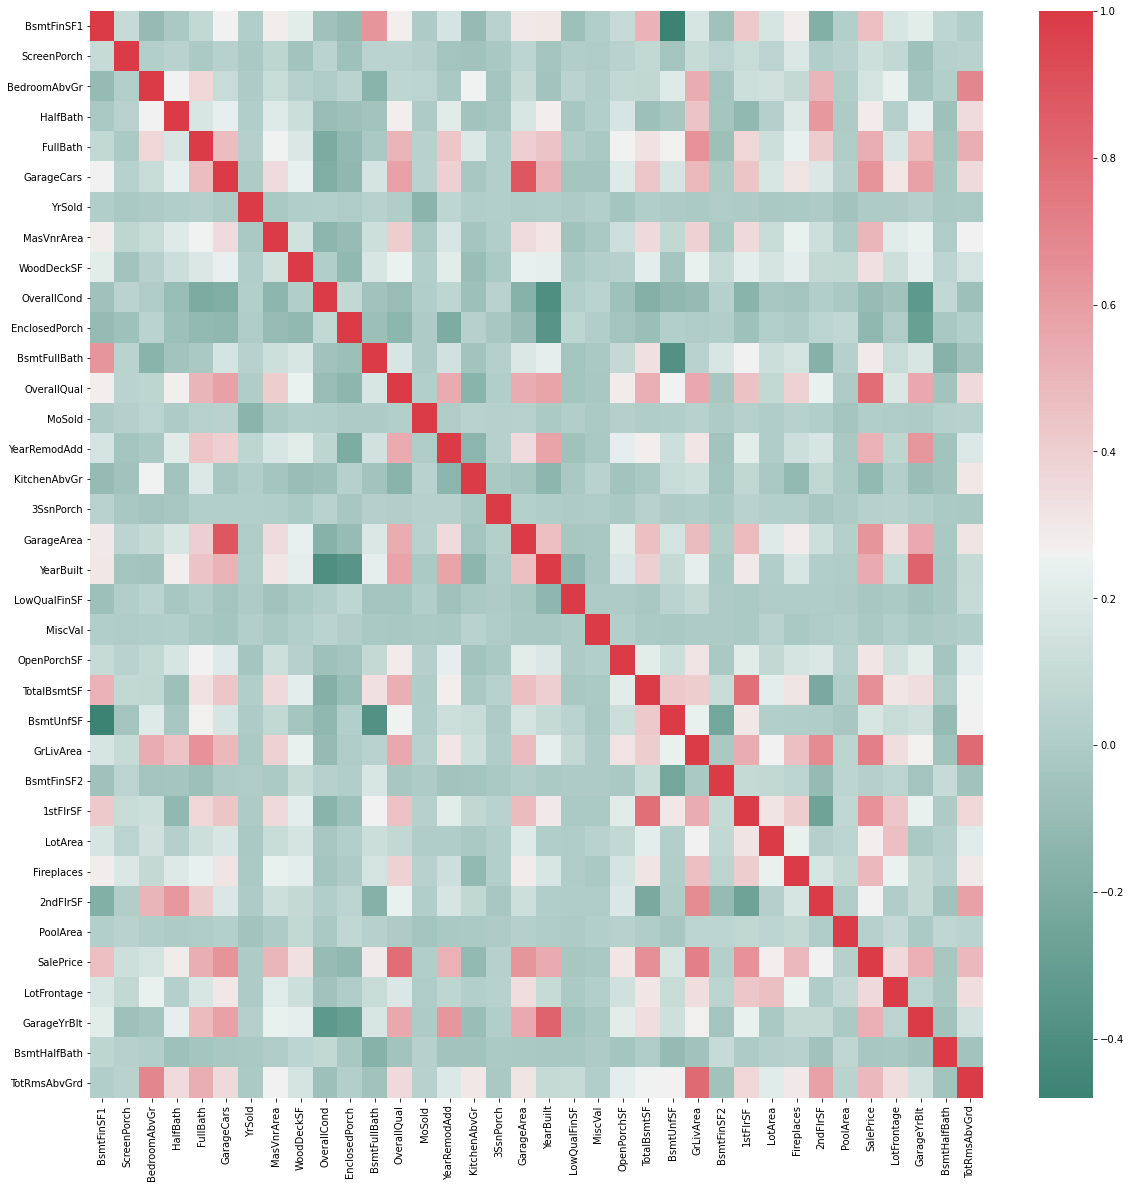

In [10]:
#correlation matrix of numeric variables
fig = plt.figure(figsize =(20,20))
ax = fig.add_subplot(111)
#cmap = sns.color_palette("coolwarm", as_cmap = True)
cmap = sns.diverging_palette(170,10,as_cmap = True)
corr = num_df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, 
                  yticklabels = corr.index.values,
                  cmap = cmap)




In [35]:
categorical = list(set(cols) - set(num_cols))

In [36]:
for feature in categorical: 
    print(HousePrice[feature].value_counts())
    print('')

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

Grvl    105
Pave     63
Name: Alley, dtype: int64

Y    2417
N     163
Name: CentralAir, dtype: int64

TA    2232
Gd     279
Fa      56
Ex      11
Po       2
Name: ExterCond, dtype: int64

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

CBlock    1140
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: Foundation, dtype: int64

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

Attchd     1527
Detchd      716
BuiltIn     153
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64

TA    2356
Fa      67
Gd      14
Po      11
Ex       3
Name: GarageCond, dtype: int64

MnP

In [37]:
missingRows = HousePrice.isnull().any(axis = 1)
missingCols = HousePrice.isnull().any(axis = 0)
HousePrice.columns[missingCols]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

Text(0.5, 1.0, 'Proportion of Missing Values')

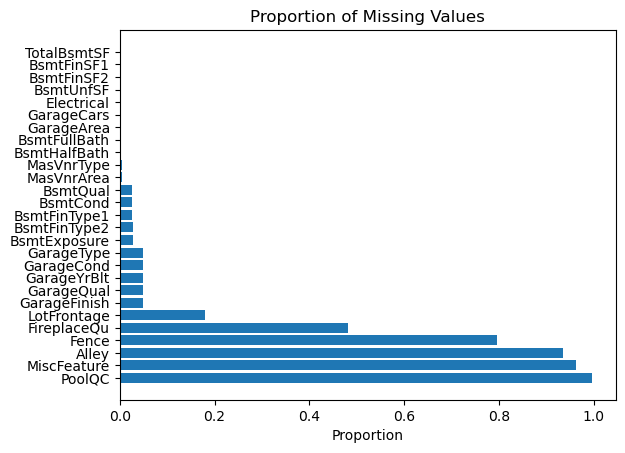

In [38]:
#count NA
prop_miss = HousePrice.isna().mean().sort_values(ascending = False)
prop_miss = prop_miss[prop_miss>0].reset_index()
prop_miss.columns = ["Variable","Proportion missing" ]
plt.rcdefaults()
fig,ax = plt.subplots()

ax.barh(prop_miss["Variable"], prop_miss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")


In [39]:
HousePrice = HousePrice.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis = 1)


In [40]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle     2580 non-null   object 
 18  OverallQu

In [41]:
# drop: PoolQC, MiscFeatures, Alley, Fence
# impute: fireplaceQual:NA-No Fireplace
#         GarageFinish: NA-No Garage
#           GarageQual: NA-No Garage

def cat_miss(var, value): 
    mis_var = HousePrice[var].isna()
    HousePrice.loc[mis_var,var]= value
cat_miss('Electrical', 'SBrkr')  #impute Electrical missing with the most frequent value
cat_miss('MasVnrType', 'None')
cat_miss('FireplaceQu','No Fireplace')

def num_miss(var, value): 
    HousePrice[var] = HousePrice[var].fillna(value)
    return 
    
num_miss('BsmtFullBath', 0)
num_miss('BsmtHalfBath', 0)
num_miss('GarageCars', 2)
num_miss('GarageArea', \
         HousePrice[HousePrice['GarageCars']==2].mean()['GarageArea'])
num_miss('MasVnrArea',0)
num_miss('GarageYrBlt',0)

# bsm_var2 = HousePrice[['BsmtFinSF1']].isna()
# mis = HousePrice['BsmtFinSF1'].isna()
# HousePrice.loc[mis,] = HousePrice.loc[mis,].fillna(0)

In [42]:

gr_var = ['GarageFinish', 'GarageQual', 'GarageYrBlt','GarageCond', 'GarageType']
HousePrice[gr_var] = HousePrice[gr_var].fillna('No Garage')
bsm_var = ['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']
HousePrice[bsm_var] = HousePrice[bsm_var].fillna('No Basement')
num_bsmt = ['BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']
HousePrice[num_bsmt] = HousePrice[num_bsmt].fillna(0)
# Impute LotFrontage using the type of dwelling in the sell

HousePrice1 = HousePrice[['MSSubClass','LotFrontage']]

LF_dict = HousePrice1.groupby('MSSubClass').mean().to_dict()
rowmissing = HousePrice1.LotFrontage.isnull()
HousePrice1.loc[rowmissing,'LotFrontage']= \
   HousePrice1[rowmissing].apply(lambda x: LF_dict['LotFrontage'][x[0]], axis = 1)
# one LotFrontage is missing because of missing group mean(only one value). 
# Because the total LotArea in this observation is quite small, I will use the the smallest group mean to impute
test = HousePrice1['LotFrontage'].isnull()
HousePrice1 = HousePrice1.fillna(HousePrice1.groupby('MSSubClass').mean().min())
HousePrice[['MSSubClass','LotFrontage']] = HousePrice1

HousePrice.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2580 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle     2580 non-null   object 
 18  OverallQu

/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


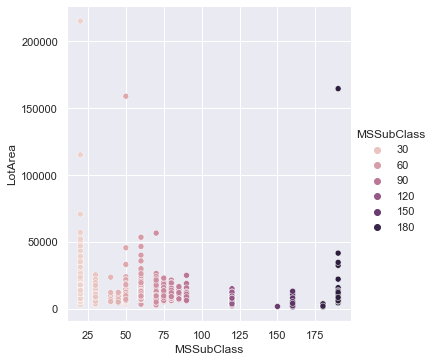

In [27]:
sns.set(rc = {'figure.figsize': (5,5)}, font_scale = 1)
sns.relplot(
    data = HousePrice, x = "MSSubClass", y = "LotArea",
           hue = 'MSSubClass',
           kind = "scatter")

# from sklearn import linear_model
# ols = linear_model.LinearRegression()

# ols.fit(x = HousePrice['LotArea'], Y = )

In [43]:
#check if there are any duplicated data
print('duplicated in realestate: {}'.format(realestate.duplicated().sum()))
print('duplicated in HousePrice: {}'.format(HousePrice.duplicated().sum()))

#keep only unique rows in realestate data
realestate = realestate.drop_duplicates()
realestate.shape

duplicated in realestate: 5
duplicated in HousePrice: 1


(22208, 91)

In [44]:
MapRefDup = realestate.loc[realestate.duplicated('MapRefNo', keep = False), ]

In [45]:
Nh_cnts = HousePrice.groupby('Neighborhood')['PID'].count().sort_values(ascending = False)

In [18]:
HousePrice.SalePrice.describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

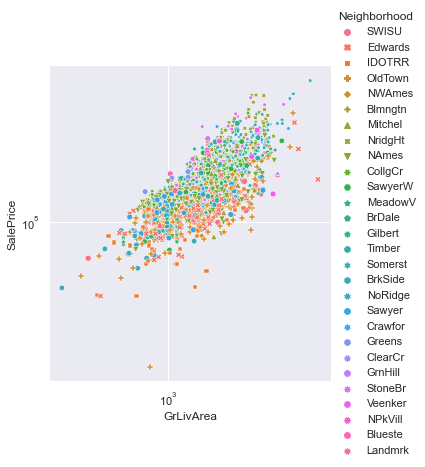

In [23]:
sns.set(rc = {'figure.figsize': (15,15)})
g = sns.relplot(data = HousePrice, x = "GrLivArea", y = "SalePrice", 
                hue = "Neighborhood",
                style = "Neighborhood")
g.set(xscale = "log")
g.set(yscale = "log")
plt.show()

<AxesSubplot:>

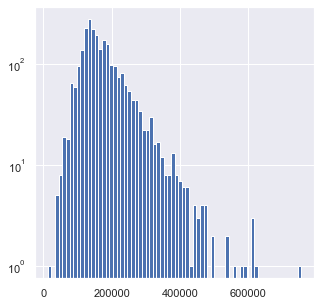

In [24]:
HousePrice['SalePrice'].hist(figsize = (5,5), bins = 70, log = True) #data transformation is needed

In [25]:
sns.set(rc = {'figure.figsize': (300,150)})
ax = sns.boxplot(x = "Neighborhood", y = "SalePrice", data = HousePrice)
ax.tick_params(labelsize = 300, labelrotation = 90)
plt.yticks(rotation = 0)
#plt.setp(ax.get_legend().get_texts(), fontsize='200') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='250') # for legend title


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000'),
  Text(0, 800000.0, '800000')])

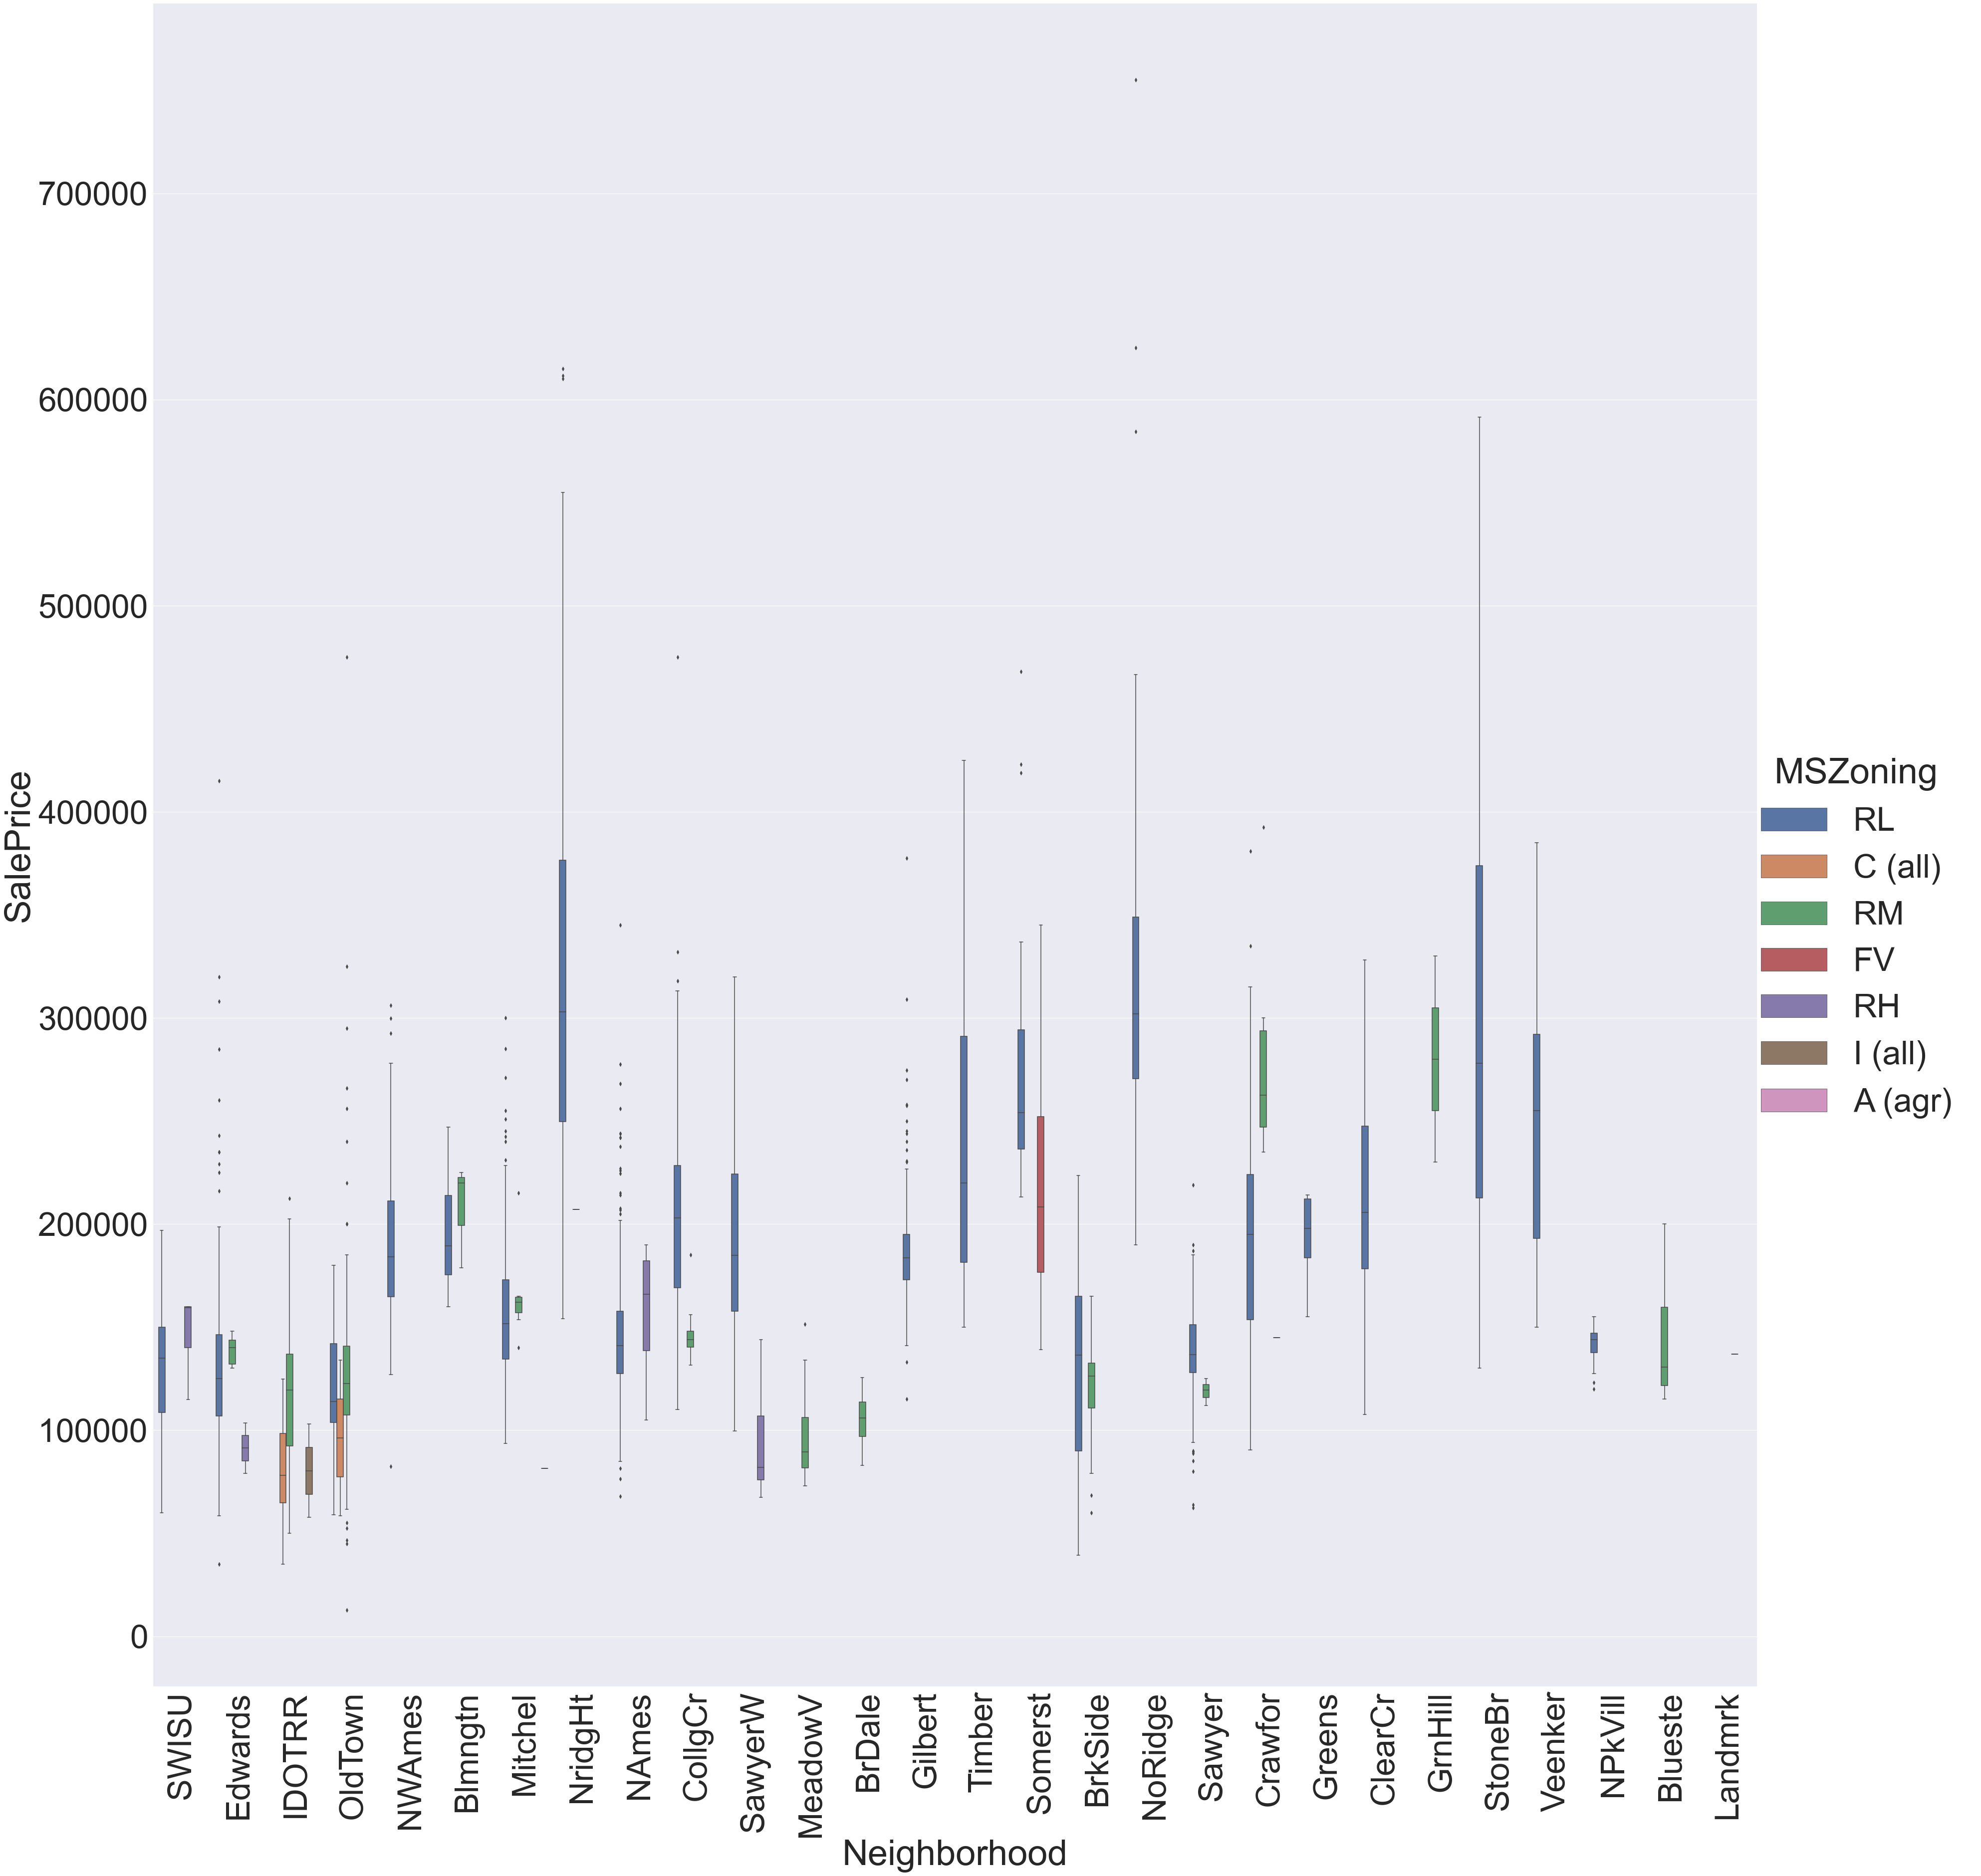

In [26]:
#Price distribution in each neighborhood by MSzoning
sns.set(rc = {'figure.figsize': (300,300)}, font_scale = 6)
g = sns.catplot(x="Neighborhood", y = "SalePrice", hue = "MSZoning",
                data = HousePrice, 
               kind = "box", height = 50)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
#Price distribution per each categorical variable


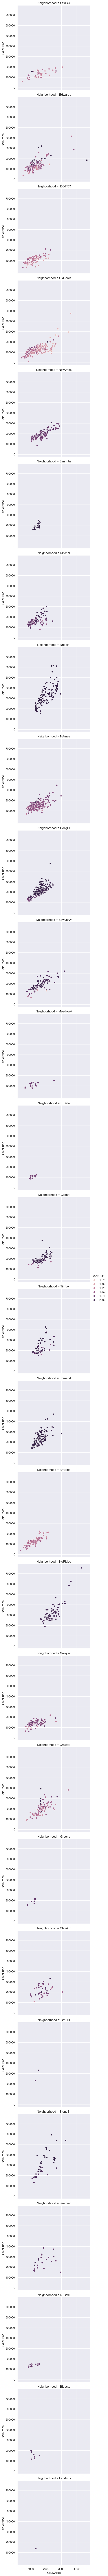

In [28]:
sns.set(rc = {'figure.figsize': (5,5)}, font_scale = 1)
sns.relplot(
    data = HousePrice, x = "GrLivArea", y = "SalePrice", 
           row ="Neighborhood",
           hue = "YearBuilt", 
           kind = "scatter")


In [36]:
HousePrice.head(5)

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley  ... ScreenPorch PoolArea PoolQC Fence  \
0          NaN     7890   Pave   NaN  ...         166        0    NaN   NaN   
1         42.0     4235   Pave   NaN  ...           0        0    NaN   NaN   
2         60.0     6060   Pave   NaN  ...           0        0    NaN   NaN   
3         80.0     8146   Pave   NaN  ...         111        0    NaN   NaN   
4         70.0     8400   Pave   NaN  ...           0        0    NaN   NaN   

  MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
0         NaN       0      3   2010      WD         Normal  
1         NaN       0      2   2009      WD         Normal  
2         NaN       0     11   2007      WD         Normal  
3         NaN       0      5   2009      WD         Normal  
4         NaN       0     11   2009      WD         Normal  

[5 rows x 82 columns]

In [46]:
realestate.loc[realestate.duplicated(['MapRefNo','Prop_Addr','ClassPr_S'], keep = False), ]

MapRefNo    GeoRefNo  Tier  Range         Prop_Addr ZngCdPr ZngCdSc  \
43      522105010   522105010     0      0    1407 LEDGES DR   FS-RL     NaN   
44      522105010   522105010     0      0    1407 LEDGES DR   FS-RL     NaN   
54      522105110   522105110     0      0    1711 LEDGES DR   FS-RL     NaN   
55      522105110   522105110     0      0    1711 LEDGES DR   FS-RL     NaN   
56      522105120   522105120     0      0    1717 LEDGES DR   FS-RL     NaN   
...           ...         ...   ...    ...               ...     ...     ...   
21584   914452190   914452190     0      0      302 OPAL CIR      RL     NaN   
22039   923225390   923225390     0      0     540 MEADOW CT   F-PRD     NaN   
22040   923225390   923225390     0      0     540 MEADOW CT   F-PRD     NaN   
22170  1007350045  1007350041     0      0  1418 S DAYTON PL     HOC     NaN   
22171  1007350045  1007350045     0      0  1418 S DAYTON PL     HOC     NaN   

      ZngOLPr ZngOLSc    ClassPr_S  ... PA-Nmbr PA-PreD  PA-Strt  PA-StSfx  \
43        NaN     NaN  RESIDENTIAL  ...    1407     NaN   LEDGES        DR   
44        NaN     NaN  RESIDENTIAL  ...    1407     NaN   LEDGES        DR   
54        NaN     NaN  RESIDENTIAL  ...    1711     NaN   LEDGES        DR   
55        NaN     NaN  RESIDENTIAL  ...    1711     NaN   LEDGES        DR   
56        NaN     NaN  RESIDENTIAL  ...    1717     NaN   LEDGES        DR   
...       ...     ...          ...  ...     ...     ...      ...       ...   
21584     NaN     NaN  RESIDENTIAL  ...     302     NaN     OPAL       CIR   
22039     NaN     NaN  RESIDENTIAL  ...     540     NaN   MEADOW        CT   
22040     NaN     NaN  RESIDENTIAL  ...     540     NaN   MEADOW        CT   
22170   O-GSE     NaN   COMMERCIAL  ...    1418       S   DAYTON        PL   
22171   O-GSE     NaN   COMMERCIAL  ...    1418       S   DAYTON        PL   

      PA-PostD PA-UnTyp PA-UntNo       Date              Source NmbrBRs  
43         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     4.0  
44         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     4.0  
54         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0  
55         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0  
56         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0  
...        ...      ...      ...        ...                 ...     ...  
21584      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     3.0  
22039      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0  
22040      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0  
22170      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     NaN  
22171      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     NaN  

[598 rows x 91 columns]

In [47]:
HousePrice1 = pd.merge(realestate[['MapRefNo', 'Prop_Addr']], HousePrice, left_on = 'MapRefNo', 
                                                             right_on = "PID", 
                                                             how = 'right')
HousePrice1.to_csv('HousePrice1.csv')